In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from typing import List, Tuple, Dict

In [6]:
def plot_metrics(*,
                 base_path: str,
                 simulation_ids: List[int],
                 plot_grid_dimensions: Tuple[int, int],
                 slope: float,
                 r_stat_multiplier: float,
                 min_rim_percentage: float,
                 effective_radius_multiplier: float,
                 metric: str,
                 metric_label: str,
                 figsize: Tuple[float, float],
                 saturation_points: Dict[int, int] = None) -> Dict[int, pd.DataFrame]:
    """
    Plots metrics for the supplied simulation ids.
    Returns a dictionary of the simulations' ids to their dataframes.
    """
    result: Dict[int, pd.DataFrame] = dict()
    
    fig, axes = plt.subplots(nrows=plot_grid_dimensions[0], ncols=plot_grid_dimensions[1], figsize=figsize)
    
    plot_counter = 0
    
    for simulation_id in simulation_ids:
        filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/{simulation_id}/statistics.csv'
        data = pd.read_csv(filename)
        data = data.rename(columns={
            'n_craters_added_in_observed_area': 'n_craters_added_in_study_region',
            'n_craters_in_observed_area': 'n_craters_in_study_region'})

        ax_row = plot_counter // plot_grid_dimensions[1]
        ax_col = plot_counter % plot_grid_dimensions[1]
        ax = axes[ax_row][ax_col]
        
        ax.plot(data.n_craters_added_in_study_region, data[metric])
        ax.set_xlabel('Craters Generated')
        ax.set_ylabel(metric_label)
        
        if saturation_points and simulation_id in saturation_points:
            ax.axvline(x=saturation_points[simulation_id], ls="--")
        
        
        result[simulation_id] = data
        
        plot_counter += 1
        
    return result

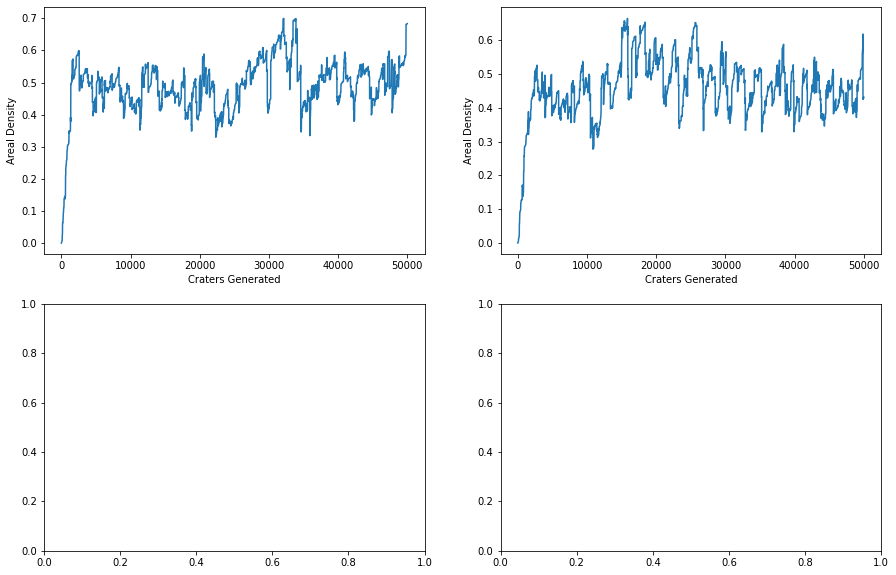

In [221]:
# For run 1.00_3.00_0.40_1.90
data = plot_metrics(base_path='/home/mason/full_runs/python/testing/',
                    simulation_ids=list(range(1, 3)),
                    plot_grid_dimensions=(2, 2),
                    slope=1.00,
                    r_stat_multiplier=3.00,
                    min_rim_percentage=0.40,
                    effective_radius_multiplier=1.50,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10))

In [23]:
import statsmodels.api as sm

In [217]:
from statsmodels.regression.rolling import RollingOLS

X = data[1].n_craters_added_in_study_region
X = sm.add_constant(X)
Y = data[1].areal_density

model = RollingOLS(Y, X, window=10000)
f = model.fit()

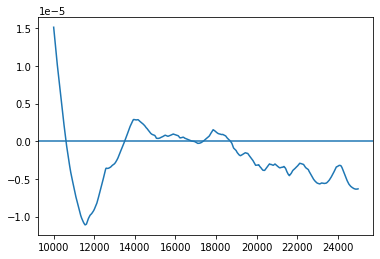

In [218]:
threshold = (2.5*3)**2*np.pi / 10000**2 / 100

d = f.params
d["is_saturated"] = d.n_craters_added_in_study_region < threshold
plt.plot(data[1].n_craters_added_in_study_region, d.n_craters_added_in_study_region)
plt.axhline(y=threshold)

In [216]:
s = d.is_saturated.rolling(1000).agg("mean") > 0.95
s[s]

5196     True
5197     True
5198     True
5199     True
5200     True
         ... 
24995    True
24996    True
24997    True
24998    True
24999    True
Name: is_saturated, Length: 8256, dtype: bool

In [ ]:
d[d.is_saturated][:40]

,const,n_craters_added_in_study_region,is_saturated
4246,0.522419,-1.416209e-08,True
4247,0.522834,-1.465662e-07,True
4248,0.523249,-2.790236e-07,True
4249,0.523664,-4.114994e-07,True
4250,0.524079,-5.440374e-07,True
4251,0.524496,-6.766450e-07,True
4252,0.524912,-8.092305e-07,True
4253,0.525329,-9.418833e-07,True
4254,0.525746,-1.074602e-06,True
4255,0.526163,-1.207377e-06,True


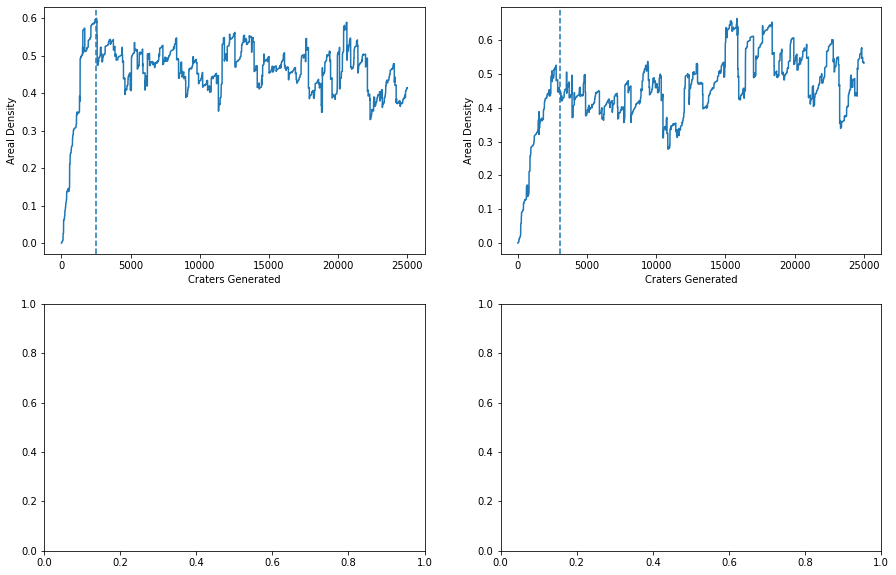

In [169]:
# For run 1.50_3.00_0.60_1.90
saturation_points = {
    1: 4246,
    2: 3053,
}
data = plot_metrics(base_path='/home/mason/full_runs/python/testing/',
                    simulation_ids=list(range(1, 3)),
                    plot_grid_dimensions=(2, 2),
                    slope=1.00,
                    r_stat_multiplier=3.00,
                    min_rim_percentage=0.40,
                    effective_radius_multiplier=1.50,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10),
                    saturation_points=saturation_points)

In [145]:
f.plot_recursive_coefficient()

,n_craters_added_in_study_region
24999,NaN
24998,NaN
24997,NaN
24996,NaN
24995,NaN
...,...
4,0.000313
3,0.000313
2,0.000313
1,0.000313


In [127]:
f.params.dropna()[-100:]

,const,n_craters_added_in_study_region
99,0.461169,-1.690689e-07
98,0.461096,-1.646749e-07
97,0.461023,-1.602816e-07
96,0.460949,-1.558893e-07
95,0.460876,-1.514981e-07
...,...,...
4,0.454230,2.468447e-07
3,0.454158,2.512060e-07
2,0.454085,2.555664e-07
1,0.454012,2.599257e-07


In [147]:
data[1].areal_density

0        0.000002
1        0.000007
2        0.000011
3        0.000011
4        0.000073
           ...   
24995    0.414603
24996    0.414603
24997    0.414605
24998    0.414614
24999    0.414614
Name: areal_density, Length: 25000, dtype: float64

1.7671458676442586e-06

In [114]:
skip_size = 

res = []
for x in range(len(data[1]) - window_size):
    sl = data[1].iloc[x:x + window_size].areal_density
    
    m = np.mean(sl)
    sd = np.std(sl)
    norm = (sl - m) / sd
    res.append(np.mean((norm > 1.96) | (norm < -1.96)))
               

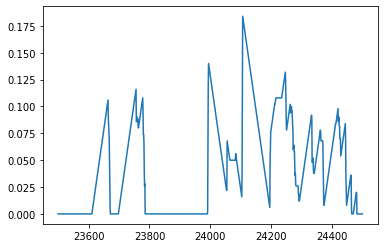